In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp


In [3]:
def sliding_window(signal, window_size:int, step_size:int):
    """
    Implementa uma janela de observação deslizante ao longo de um sinal.

    Parameters:
    ----------
    signal: np.array- ou list-like
        Sinal de entrada; pode ser uma lista ou um array numpy.

    window_size: int
        Tamanho da janela de observação, dado em elementos do sinal de entrada.

    step_size: int
        Valor do deslocamento da janela de observada, em elementos do sinal de
        entrada.

    Returns:
    --------
    Um gerador Python que retorna uma seção do sinal de entrada a cada iteração.

    """
    for i in range(0, len(signal) - window_size + 1, step_size):
        yield signal[i:i+window_size]




In [37]:
path    = "r:\Downloads\DogMoveData_csv_format\DogMoveData.csv"
path2   = "r:\Downloads\DogMoveData_csv_format\DogInfo.csv"
df_data = pd.read_csv(path)
df_info = pd.read_csv(path2)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Reyso\AppData\Local\Temp\ipykernel_4872\592326588.py:1: SyntaxWarning: invalid escape sequence '\D'
  path    = "r:\Downloads\DogMoveData_csv_format\DogMoveData.csv"
C:\Users\Reyso\AppData\Local\Temp\ipykernel_4872\592326588.py:2: SyntaxWarning: invalid escape sequence '\D'
  path2   = "r:\Downloads\DogMoveData_csv_format\DogInfo.csv"


In [38]:
df_data.columns

Index(['DogID', 'TestNum', 't_sec', 'ABack_x', 'ABack_y', 'ABack_z', 'ANeck_x',
       'ANeck_y', 'ANeck_z', 'GBack_x', 'GBack_y', 'GBack_z', 'GNeck_x',
       'GNeck_y', 'GNeck_z', 'Task', 'Behavior_1', 'Behavior_2', 'Behavior_3',
       'PointEvent'],
      dtype='object')

In [39]:
df_info.columns

Index(['DogID', 'Breed', 'Weight', 'Age months', 'Gender', 'NeuteringStatus'], dtype='object')

In [43]:
df_info['Breed'].nunique()

26

In [45]:
df_data['DogID'].nunique()

45

In [7]:
df = df.loc[:, ~df.columns.str.contains('Back')]
df.head()

,DogID,TestNum,t_sec,ANeck_x,ANeck_y,ANeck_z,GNeck_x,GNeck_y,GNeck_z,Task,Behavior_1,Behavior_2,Behavior_3,PointEvent
0,16,1,0.00,-0.067871,-0.510254,-0.934570,-7.934571,6.347657,13.427735,<undefined>,<undefined>,<undefined>,<undefined>,<undefined>
1,16,1,0.01,-0.128906,-0.494141,-0.913086,-3.906250,4.394532,16.540528,<undefined>,Synchronization,<undefined>,<undefined>,<undefined>
2,16,1,0.02,-0.158691,-0.480469,-0.911133,-0.488281,-1.953125,26.794435,<undefined>,Synchronization,<undefined>,<undefined>,<undefined>
3,16,1,0.03,-0.122070,-0.486816,-0.880371,1.159668,-5.676270,38.085940,<undefined>,Synchronization,<undefined>,<undefined>,<undefined>
4,16,1,0.04,-0.053711,-0.500000,-0.807129,4.577637,4.089356,41.503909,<undefined>,Synchronization,<undefined>,<undefined>,<undefined>


In [9]:
df = df.loc[:, ~df.columns.str.contains('Back')]
print(df.head())

   DogID  TestNum  t_sec   ANeck_x   ANeck_y   ANeck_z   GNeck_x   GNeck_y  \
0     16        1   0.00 -0.067871 -0.510254 -0.934570 -7.934571  6.347657   
1     16        1   0.01 -0.128906 -0.494141 -0.913086 -3.906250  4.394532   
2     16        1   0.02 -0.158691 -0.480469 -0.911133 -0.488281 -1.953125   
3     16        1   0.03 -0.122070 -0.486816 -0.880371  1.159668 -5.676270   
4     16        1   0.04 -0.053711 -0.500000 -0.807129  4.577637  4.089356   

     GNeck_z         Task       Behavior_1   Behavior_2   Behavior_3  \
0  13.427735  <undefined>      <undefined>  <undefined>  <undefined>   
1  16.540528  <undefined>  Synchronization  <undefined>  <undefined>   
2  26.794435  <undefined>  Synchronization  <undefined>  <undefined>   
3  38.085940  <undefined>  Synchronization  <undefined>  <undefined>   
4  41.503909  <undefined>  Synchronization  <undefined>  <undefined>   

    PointEvent  
0  <undefined>  
1  <undefined>  
2  <undefined>  
3  <undefined>  
4  <undefined

In [11]:
df.describe()

,DogID,TestNum,t_sec,ANeck_x,ANeck_y,ANeck_z,GNeck_x,GNeck_y,GNeck_z
count,1.061107e+07,1.061107e+07,1.061107e+07,1.061107e+07,1.061107e+07,1.061107e+07,1.061107e+07,1.061107e+07,1.061107e+07
mean,4.388821e+01,1.333002e+00,8.629406e+02,-1.701528e-01,-4.128977e-01,-6.305329e-01,6.878519e-01,-1.457102e-01,1.303734e-01
std,1.673927e+01,4.712874e-01,5.067347e+02,6.013990e-01,6.427448e-01,6.402730e-01,7.211301e+01,1.183165e+02,6.727215e+01
min,1.600000e+01,1.000000e+00,0.000000e+00,-1.600000e+01,-1.600000e+01,-1.600000e+01,-2.000000e+03,-2.000000e+03,-1.667447e+03
25%,2.900000e+01,1.000000e+00,4.278600e+02,-4.213870e-01,-8.188480e-01,-8.208010e-01,-1.434326e+01,-1.715088e+01,-1.586914e+01
50%,4.500000e+01,1.000000e+00,8.557300e+02,-1.821290e-01,-5.742190e-01,-6.212600e-01,1.220700e-01,-6.103500e-02,-6.103500e-02
75%,5.700000e+01,2.000000e+00,1.283590e+03,6.689500e-02,-1.035160e-01,-3.769530e-01,1.751709e+01,1.647949e+01,1.477051e+01
max,7.400000e+01,2.000000e+00,2.176550e+03,1.599951e+01,1.599951e+01,1.599951e+01,1.999939e+03,1.999939e+03,1.999939e+03


## Filtro

Ordem do filtro:  4




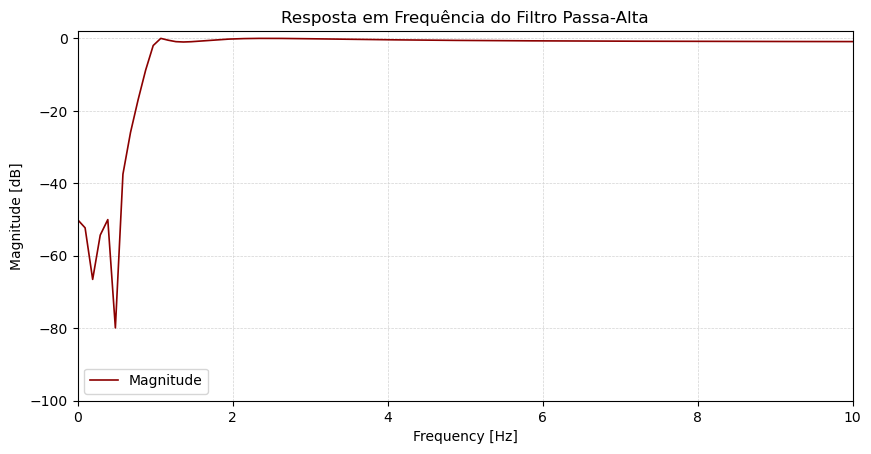

In [34]:
gp = 1     # passband gain (dB)
gs = 50    # stopband gain (actually, minimum attenuation, in dB)

fss = 100      # sampling frequency (Hz)
fp2 = 1   # passband frequency  (Hz)
fs2 = 0.5    # stopband frequency (Hz)

fn = fss/2    # Nyquist frequency


filtype = 'ellip'  # qual aproximation
b, a = sp.iirdesign(fs=fss,wp=fp2,ws=fs2,gpass=gp,gstop=gs,analog=False,
                    ftype=filtype,output='ba') # função de projeto do filtro IIR

# Cálculo da resposta em frequência
w, h = sp.freqz(b, a, None, fs = fss)
h_mag = 20 * np.log10( abs(h)) # frequency response magnitude (dB)
h_ang = np.unwrap(np.angle(h)) # frequency response phase

print('Ordem do filtro: ', len(a)-1)
print('\n')

# Gráficos da resposta em frequência
fig = plt.figure(figsize=(10, 4.8))
plt.plot( w,h_mag , linewidth = 1.20, label = 'Magnitude', color='darkred')
plt.title('Resposta em Frequência do Filtro Passa-Alta')
plt.ylabel('Magnitude [dB]', color = 'black')
plt.xlabel('Frequency [Hz]')
plt.grid(which='both', axis='both', color='LightGray', linestyle='dashed', linewidth = 0.5)
plt.axis([0,10, -100,2])
## Gera legenda
plt.legend()
plt.show()

Ordem do filtro:  6




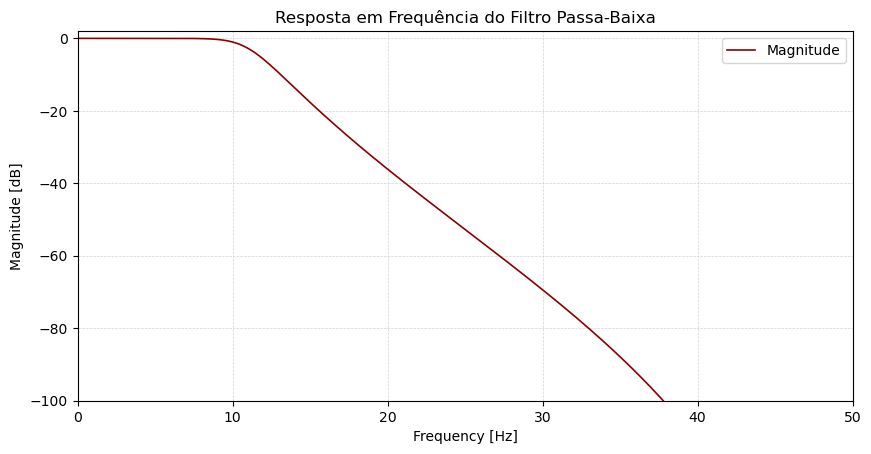

In [36]:
gp = 1     # passband gain (dB)
gs = 50    # stopband gain (actually, minimum attenuation, in dB)

fss = 100      # sampling frequency (Hz)
fp2 = 10   # passband frequency  (Hz)
fs2 = 25    # stopband frequency (Hz)

fn = fss/2    # Nyquist frequency


filtype = 'butter'  # qual aproximation
b, a = sp.iirdesign(fs=fss,wp=fp2,ws=fs2,gpass=gp,gstop=gs,analog=False,
                    ftype=filtype,output='ba') # função de projeto do filtro IIR

# Cálculo da resposta em frequência
w, h = sp.freqz(b, a, None, fs = fss)
h_mag = 20 * np.log10( abs(h)) # frequency response magnitude (dB)
h_ang = np.unwrap(np.angle(h)) # frequency response phase

print('Ordem do filtro: ', len(a)-1)
print('\n')

# Gráficos da resposta em frequência
fig = plt.figure(figsize=(10, 4.8))
plt.plot( w,h_mag , linewidth = 1.20, label = 'Magnitude', color='darkred')
plt.title('Resposta em Frequência do Filtro Passa-Baixa')
plt.ylabel('Magnitude [dB]', color = 'black')
plt.xlabel('Frequency [Hz]')
plt.grid(which='both', axis='both', color='LightGray', linestyle='dashed', linewidth = 0.5)
plt.axis([0,50, -100,2])
## Gera legenda
plt.legend()
plt.show()

## Normal Euclidiana

In [13]:
df.head()

,DogID,TestNum,t_sec,ANeck_x,ANeck_y,ANeck_z,GNeck_x,GNeck_y,GNeck_z,Task,Behavior_1,Behavior_2,Behavior_3,PointEvent
0,16,1,0.00,-0.067871,-0.510254,-0.934570,-7.934571,6.347657,13.427735,<undefined>,<undefined>,<undefined>,<undefined>,<undefined>
1,16,1,0.01,-0.128906,-0.494141,-0.913086,-3.906250,4.394532,16.540528,<undefined>,Synchronization,<undefined>,<undefined>,<undefined>
2,16,1,0.02,-0.158691,-0.480469,-0.911133,-0.488281,-1.953125,26.794435,<undefined>,Synchronization,<undefined>,<undefined>,<undefined>
3,16,1,0.03,-0.122070,-0.486816,-0.880371,1.159668,-5.676270,38.085940,<undefined>,Synchronization,<undefined>,<undefined>,<undefined>
4,16,1,0.04,-0.053711,-0.500000,-0.807129,4.577637,4.089356,41.503909,<undefined>,Synchronization,<undefined>,<undefined>,<undefined>


In [17]:
df.describe()

,DogID,TestNum,t_sec,ANeck_x,ANeck_y,ANeck_z,GNeck_x,GNeck_y,GNeck_z
count,1.061107e+07,1.061107e+07,1.061107e+07,1.061107e+07,1.061107e+07,1.061107e+07,1.061107e+07,1.061107e+07,1.061107e+07
mean,4.388821e+01,1.333002e+00,8.629406e+02,-1.701528e-01,-4.128977e-01,-6.305329e-01,6.878519e-01,-1.457102e-01,1.303734e-01
std,1.673927e+01,4.712874e-01,5.067347e+02,6.013990e-01,6.427448e-01,6.402730e-01,7.211301e+01,1.183165e+02,6.727215e+01
min,1.600000e+01,1.000000e+00,0.000000e+00,-1.600000e+01,-1.600000e+01,-1.600000e+01,-2.000000e+03,-2.000000e+03,-1.667447e+03
25%,2.900000e+01,1.000000e+00,4.278600e+02,-4.213870e-01,-8.188480e-01,-8.208010e-01,-1.434326e+01,-1.715088e+01,-1.586914e+01
50%,4.500000e+01,1.000000e+00,8.557300e+02,-1.821290e-01,-5.742190e-01,-6.212600e-01,1.220700e-01,-6.103500e-02,-6.103500e-02
75%,5.700000e+01,2.000000e+00,1.283590e+03,6.689500e-02,-1.035160e-01,-3.769530e-01,1.751709e+01,1.647949e+01,1.477051e+01
max,7.400000e+01,2.000000e+00,2.176550e+03,1.599951e+01,1.599951e+01,1.599951e+01,1.999939e+03,1.999939e+03,1.999939e+03


In [25]:
df['DogID'].unique()

array([16, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 33, 34, 36, 39,
       41, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59,
       60, 61, 63, 65, 66, 67, 68, 70, 72, 73, 74], dtype=int64)

# Assistant
Para calcular as normas euclidianas dos sinais de acelerômetro e giroscópio para cada "DogID" no seu DataFrame `df`, você precisará usar a biblioteca `pandas` para manipulação de dados e `numpy` para cálculos numéricos.

Aqui está um passo a passo de como você pode fazer isso:

1. **Importar as bibliotecas necessárias**: Você precisará do `pandas` e `numpy`.
2. **Calcular a norma euclidiana**: A norma euclidiana para um vetor \((x, y, z)\) é dada por \(\sqrt{x^2 + y^2 + z^2}\).
3. **Agrupar os dados por "DogID"**: Você pode usar o método `groupby` do `pandas` para agrupar os dados por "DogID".

Aqui está um exemplo de código que realiza esses passos:


In [47]:
df.columns

Index(['DogID', 'TestNum', 't_sec', 'ANeck_x', 'ANeck_y', 'ANeck_z', 'GNeck_x',
       'GNeck_y', 'GNeck_z', 'Task', 'Behavior_1', 'Behavior_2', 'Behavior_3',
       'PointEvent'],
      dtype='object')

In [68]:
import pandas as pd
import numpy as np

# Supondo que df já esteja carregado e tenha as colunas 'DogID', 'acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z'
# Calcular a norma euclidiana para acelerômetro
df['acc_norm'] = np.sqrt(df['ANeck_x']**2 + df['ANeck_y']**2 + df['ANeck_z']**2)

# Calcular a norma euclidiana para giroscópio
df['gyro_norm'] = np.sqrt(df['GNeck_x']**2 + df['GNeck_y']**2 + df['GNeck_z']**2)

# Agrupar por 'DogID' e calcular a média das normas
df_norma = df.groupby('DogID')[['acc_norm', 'gyro_norm']].mean().reset_index()


result.sample(10)

,DogID,acc_norm,gyro_norm
6,23,1.107120,83.671887
35,61,1.078129,65.437923
21,46,1.138280,61.635558
12,30,1.117547,61.923780
32,58,1.111800,80.852010
34,60,1.100248,70.212815
7,25,1.123305,72.468967
28,54,1.161457,90.242644
20,45,1.197798,79.276400
42,72,1.097956,63.287644


In [88]:
w_gen = sliding_window(df['acc_norm'], 100, 10)
w_list = []

In [89]:
# Exemplo de utilização
for sig_w in w_gen: # iteração sobre o gerador definido
    w_list.append(sig_w) #save each window

In [90]:
w_list

[0     1.066952
 1     1.046192
 2     1.042208
 3     1.013382
 4     0.950969
         ...   
 95    0.998691
 96    1.003436
 97    1.009186
 98    1.012203
 99    1.011968
 Name: acc_norm, Length: 100, dtype: float64,
 10     1.240458
 11     1.184350
 12     1.109800
 13     1.077343
 14     1.051646
          ...   
 105    1.012558
 106    1.013251
 107    1.026504
 108    1.031907
 109    1.030132
 Name: acc_norm, Length: 100, dtype: float64,
 20     0.961297
 21     0.962238
 22     0.963997
 23     0.970345
 24     0.974156
          ...   
 115    1.013143
 116    1.009418
 117    1.007316
 118    1.001815
 119    0.999352
 Name: acc_norm, Length: 100, dtype: float64,
 30     0.982179
 31     0.993697
 32     1.004197
 33     1.004218
 34     0.988147
          ...   
 125    1.016024
 126    1.015627
 127    1.011800
 128    1.014861
 129    1.024410
 Name: acc_norm, Length: 100, dtype: float64,
 40     1.002163
 41     0.988878
 42     0.983779
 43     1.002040
 44     1.0

In [95]:
df['acc_norm'] = np.array(df['acc_norm'])